<a href="https://colab.research.google.com/github/rnabilahusna/MP_ProductReview/blob/main/amz_review_theordinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [5]:
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/the-ordinary/the-ordinary-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/the-ordinary/the-ordinary-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/the-ordinary/the-ordinary-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/the-ordinary/the-ordinary-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/the-ordinary/the-ordinary-5-stars.csv',
]

# Create an empty list to store DataFrames
dataframes = []

# Read each CSV file into a DataFrame and append to the list
for file_path in file_paths:
    d_frame = pd.read_csv(file_path)
    dataframes.append(d_frame)

# Merge all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# Display the merged DataFrame
df

,product,title,rating,body
0,Amazon.com: Customer reviews: THE ORDINARY Nia...,"1.0 out of 5 stars\nvery disappointed, gave me...",1.0,ok so i was very excited for this product. i m...
1,Amazon.com: Customer reviews: THE ORDINARY Nia...,1.0 out of 5 stars\nNOT WHAT I’M USED TO.,1.0,So i’ve bought this product before from Target...
2,Amazon.com: Customer reviews: THE ORDINARY Nia...,1.0 out of 5 stars\nBro…,1.0,Can someone please explain to me why my serum ...
3,Amazon.com: Customer reviews: THE ORDINARY Nia...,"1.0 out of 5 stars\nDisgusting, Unsealed & Bro...",1.0,"When this product arrived, it was a brown liqu..."
4,Amazon.com: Customer reviews: THE ORDINARY Nia...,1.0 out of 5 stars\nDo not buy this product!!!!,1.0,The original product is very good! The one I o...
...,...,...,...,...
291,Amazon.com: Customer reviews: THE ORDINARY Nia...,5.0 out of 5 stars\nBrightens skin and lighten...,5.0,I really like this serum. This is at least the...
292,Amazon.com: Customer reviews: THE ORDINARY Nia...,5.0 out of 5 stars\nEffective,5.0,Does a great job at keeping my face clear of p...
293,Amazon.com: Customer reviews: THE ORDINARY Nia...,5.0 out of 5 stars\nLo maximo,5.0,Excelente para las espinillas si me reseca un ...
294,Amazon.com: Customer reviews: THE ORDINARY Nia...,5.0 out of 5 stars\nIt Works ❤️,5.0,I’ve been searching for skin care products for...


In [ ]:
df.head()

In [ ]:
df.tail()

In [8]:
df.drop(columns = ['product', 'title'], inplace = True)
df.rename(columns = {'rating':'Rating', 'body':'Review'}, inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,1.0,ok so i was very excited for this product. i m...
1,1.0,So i’ve bought this product before from Target...
2,1.0,Can someone please explain to me why my serum ...
3,1.0,"When this product arrived, it was a brown liqu..."
4,1.0,The original product is very good! The one I o...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  296 non-null    float64
 1   Review  295 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.8+ KB




---



---



#**Preprocessing Data**

## 1.   Data Cleaning



In [10]:
import string
import re

In [11]:
df.shape

(296, 2)

In [13]:
# Remove rows that contain empty cells
df.dropna(inplace = True)

# Remove duplicates
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(295, 2)

## 2.   Case Folding

In [15]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1:0, 2:0, 3:0, 4:1, 5:1})

###Adding additional features

In [16]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct
0,1.0,ok so i was very excited for this product. i m...,ok so i was very excited for this product i m...,0,987,3.3
1,1.0,So i’ve bought this product before from Target...,so i ve bought this product before from target...,0,454,4.0
2,1.0,Can someone please explain to me why my serum ...,can someone please explain to me why my serum ...,0,143,2.8
3,1.0,"When this product arrived, it was a brown liqu...",when this product arrived it was a brown liqu...,0,203,3.9
4,1.0,The original product is very good! The one I o...,the original product is very good the one i o...,0,145,3.4


## 3.   Tokenization

In [17]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct,tokens
0,1.0,ok so i was very excited for this product. i m...,ok so i was very excited for this product i m...,0,987,3.3,"[ok, so, i, was, very, excited, for, this, pro..."
1,1.0,So i’ve bought this product before from Target...,so i ve bought this product before from target...,0,454,4.0,"[so, i, ve, bought, this, product, before, fro..."
2,1.0,Can someone please explain to me why my serum ...,can someone please explain to me why my serum ...,0,143,2.8,"[can, someone, please, explain, to, me, why, m..."
3,1.0,"When this product arrived, it was a brown liqu...",when this product arrived it was a brown liqu...,0,203,3.9,"[when, this, product, arrived, it, was, a, bro..."
4,1.0,The original product is very good! The one I o...,the original product is very good the one i o...,0,145,3.4,"[the, original, product, is, very, good, the, ..."


## 4.   Stopword Removal

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

## 5.   Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()



---



#**EDA**

In [22]:
#Shape of the dataset, and breakdown of the classes

print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 295 rows and 8 columns
rating 1.0 = 99 rows
rating 2.0 = 20 rows
rating 3.0 = 31 rows
rating 4.0 = 45 rows
rating 5.0 = 100 rows


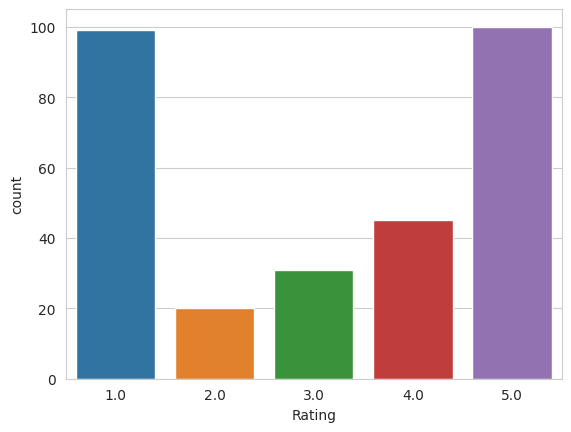

In [23]:
# Plotting the rate for each rating

sns.countplot(x='Rating', data=df);

#**Word Frequency Visualization using Word Cloud**

In [24]:
from wordcloud import WordCloud

In [25]:
df_negative = df[ (df['Rating']==1) | (df['Rating']==2) | (df['Rating']==3)]
df_positive = df[ (df['Rating']==4) | (df['Rating']==5)]

# Converting to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()
# negative_list=df_negative['stemmed_review'].tolist()
# positive_list= df_positive['stemmed_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

##**Word Cloud:** Positive Reviews

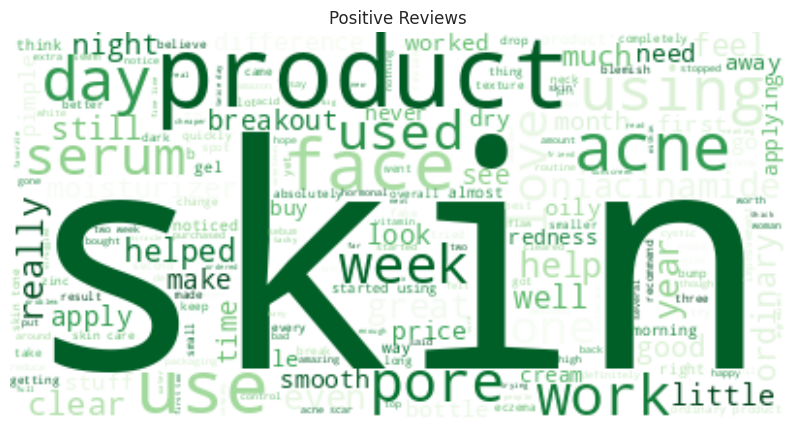

In [26]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews")
plt.show()

##**Word Cloud:** Negative Reviews

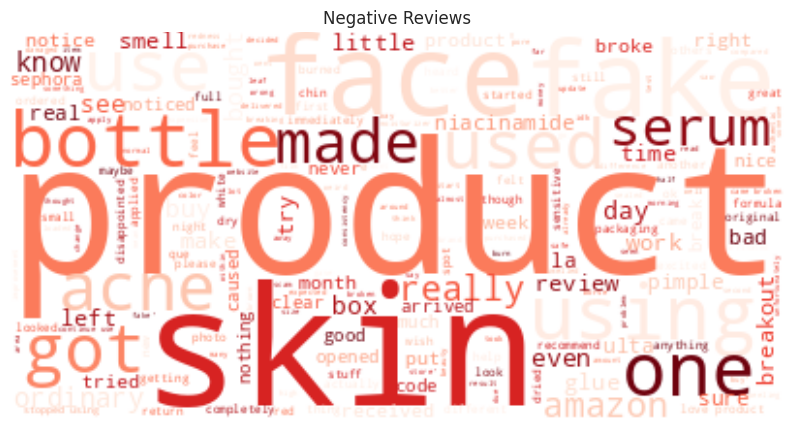

In [27]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews")
plt.show()



---



#**Feature Extraction from Text**



*   TF-IDF Vectorizer



In [28]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(295, 3)
(295,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(206, 3)
(89, 3)
(206,)
(89,)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562
0,289,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.193546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.226835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251367,0.0,0.0,0.0,0.0,0.0,0.0,0.475102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.157915,0.0,0.0,0.0,0.170975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157915,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.210676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,



---



---



#**Model Development**

##Multinomial Naive Bayes (MNB)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.73      0.71      0.72        49

    accuracy                           0.70        89
   macro avg       0.69      0.69      0.69        89
weighted avg       0.70      0.70      0.70        89



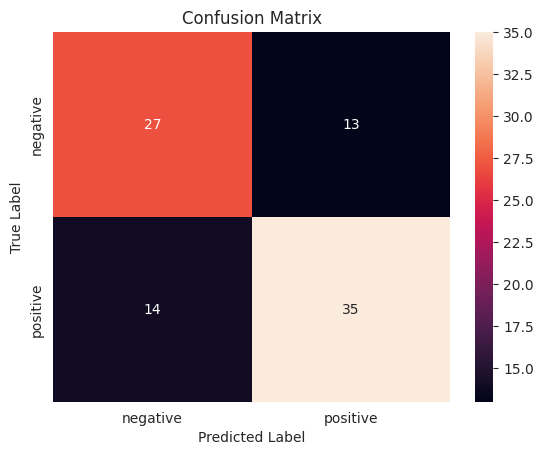

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##K-Nearest Neighbor (KNN)

              precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.52      0.29      0.37        49

    accuracy                           0.46        89
   macro avg       0.48      0.48      0.45        89
weighted avg       0.48      0.46      0.44        89



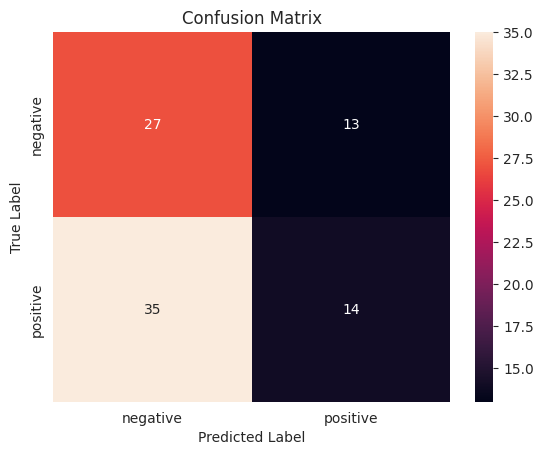

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Random Forest


In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

#**Confusion Matrix Visualization**



*   TF-IDF Vectorizer



##Multinomial Naive Bayes (MNB)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.73      0.71      0.72        49

    accuracy                           0.70        89
   macro avg       0.69      0.69      0.69        89
weighted avg       0.70      0.70      0.70        89



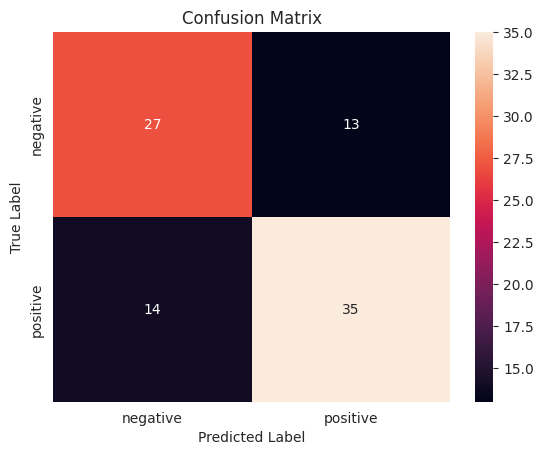

In [36]:
# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Logistic Regression


              precision    recall  f1-score   support

           0       0.61      0.82      0.70        40
           1       0.80      0.57      0.67        49

    accuracy                           0.69        89
   macro avg       0.71      0.70      0.68        89
weighted avg       0.72      0.69      0.68        89



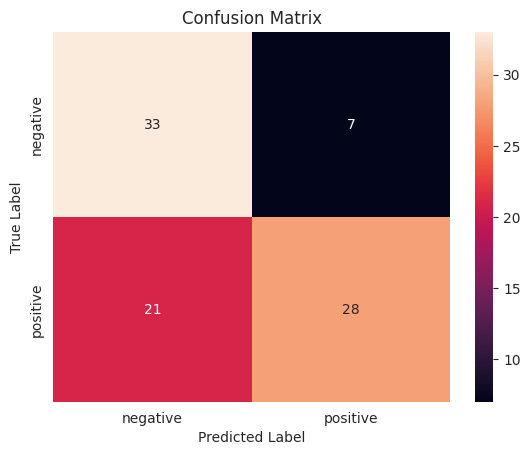

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Random Forest

              precision    recall  f1-score   support

           0       0.61      0.90      0.73        40
           1       0.87      0.53      0.66        49

    accuracy                           0.70        89
   macro avg       0.74      0.72      0.69        89
weighted avg       0.75      0.70      0.69        89



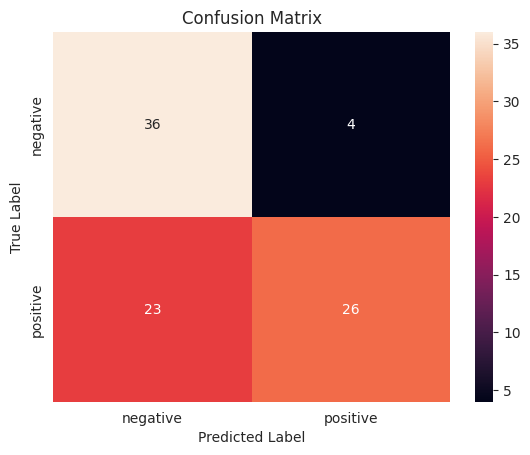

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Support Vector Machine (SVM)


              precision    recall  f1-score   support

           0       0.63      0.78      0.70        40
           1       0.78      0.63      0.70        49

    accuracy                           0.70        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.71      0.70      0.70        89



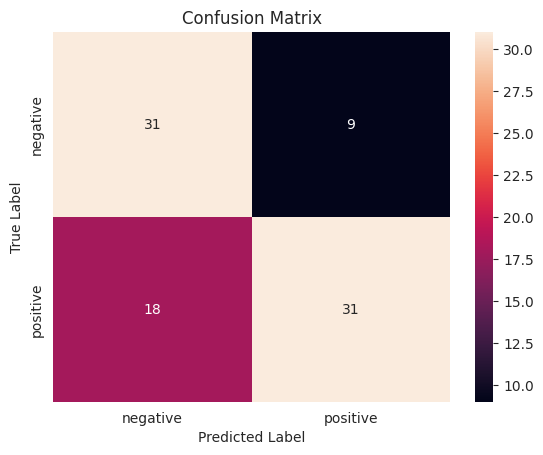

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##K-Nearest Neighbor (KNN)

              precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.52      0.29      0.37        49

    accuracy                           0.46        89
   macro avg       0.48      0.48      0.45        89
weighted avg       0.48      0.46      0.44        89



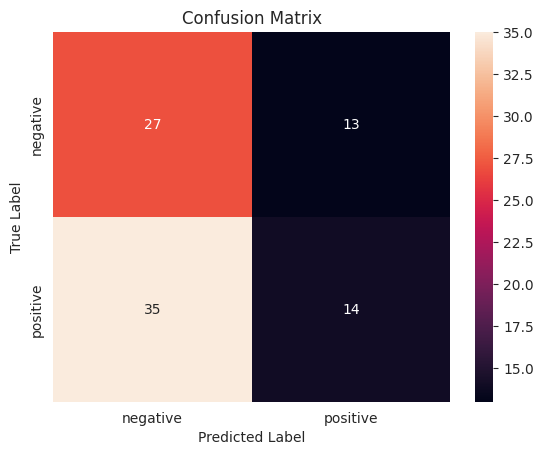

In [37]:
# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Extra Trees Classifier


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        40
           1       0.77      0.55      0.64        49

    accuracy                           0.66        89
   macro avg       0.68      0.68      0.66        89
weighted avg       0.69      0.66      0.66        89



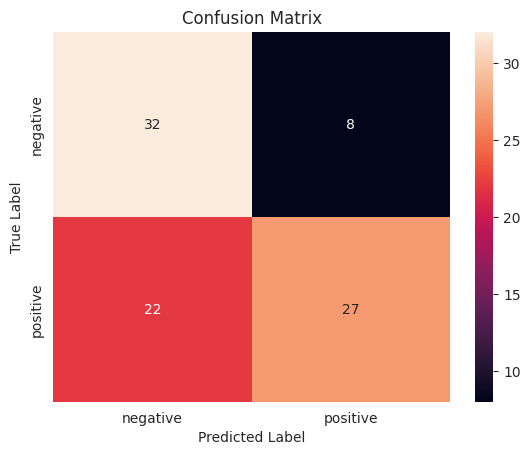

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




---



#**K-Fold Cross Validation**

Comparing both ML techniques' by classification metrics.

In [45]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.5916666666666667 
 precision - 0.59498556998557 
 recall - 0.6166666666666667 
 f1 - 0.5920804151353349 

Logistic Regression
 accuracy - 0.7240476190476189 
 precision - 0.7607142857142857 
 recall - 0.5955555555555556 
 f1 - 0.6661807705538355 

Random Forest
 accuracy - 0.647142857142857 
 precision - 0.6638095238095237 
 recall - 0.43666666666666665 
 f1 - 0.5637116641528406 

SVM
 accuracy - 0.7185714285714286 
 precision - 0.7367063492063493 
 recall - 0.6144444444444443 
 f1 - 0.6640720674234606 

KNN
 accuracy - 0.5288095238095238 
 precision - 0.5266666666666666 
 recall - 0.4488888888888889 
 f1 - 0.4722507471888277 

Extra Trees
 accuracy - 0.7095238095238094 
 precision - 0.7466269841269841 
 recall - 0.5844444444444444 
 f1 - 0.6529016167870656 



#**Predictions Testing**


*   TF-IDF Vectorizer




*   Support Vector Machine (SVM)



In [46]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 10)

SVM_classifier.fit(tfidf_train, y_train)
SVM_classifier.score(tfidf_test, y_test)

0.6966292134831461

In [48]:
data = ["Bad", "Love it", "I hate the product, it's really bad", "It feels so smooth on my skin"]
vect = tfidf.transform(data).toarray()

my_pred = SVM_classifier.predict(vect)
print(my_pred)

[0 1 0 1]




*   KNN



In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the classifier to the training data
knn_classifier.fit(tfidf_train, y_train)
accuracy = knn_classifier.score(tfidf_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.449438202247191


In [52]:
new_data = ["Bad", "Love it", "I hate the product, it's really bad", "Feels tingle on my skin"]
vect = tfidf.transform(new_data).toarray()

my_pred = knn_classifier.predict(vect)
print(my_pred)

[0 1 0 0]




*   Random Forest



In [53]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (n_estimators) as needed

# Fit the classifier to the training data
rf_classifier.fit(tfidf_train, y_train)

# Calculate and print the accuracy
accuracy = rf_classifier.score(tfidf_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7078651685393258


In [55]:
newest_data = ["Bad", "I like it", "I hate the product, it's really bad", "It feels so smooth on my skin"]
vect_rf = tfidf.transform(newest_data).toarray()

my_pred_rf = rf_classifier.predict(vect_rf)
print(my_pred_rf)

[0 0 0 1]
